In [20]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data', header=None)

# if the Breast Cancer dataset is temporarily unavailable from the
# UCI machine learning repository, un-comment the following line
# of code to load the dataset from a local path:

# df = pd.read_csv('wdbc.data', header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
df.shape

(569, 32)

In [22]:
from sklearn.preprocessing import LabelEncoder
X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

In [23]:
le.transform(['M', 'B'])

array([1, 0])

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.20,
                     stratify=y,
                     random_state=1)

### パイプラインで変換器と推定器を結合する

入力の特徴量を揃えるのと、主成分分析を用いて３０次元から２次元に変換

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# 変換器と推定器の結合
pipe_lr = make_pipeline(
    StandardScaler(),
    PCA(n_components=2),
    LogisticRegression(random_state=1)
)
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.956


### K分割交差検証を使ったモデルの性能の評価

トレーニングデータに対してモデルが単純すぎると、<br>
学習不足（バイアスが高い）に陥り、複雑すぎると過学習（バリアンスが高い）状態になる。<br>

ここでは、ホールドアウト法とk分割交差検証という便利な交差検証交差検証について説明する。<br>
これらを利用すれば、モデルの汎化性能を的確に推定できるようになる。<br>

### ホールドアウト法

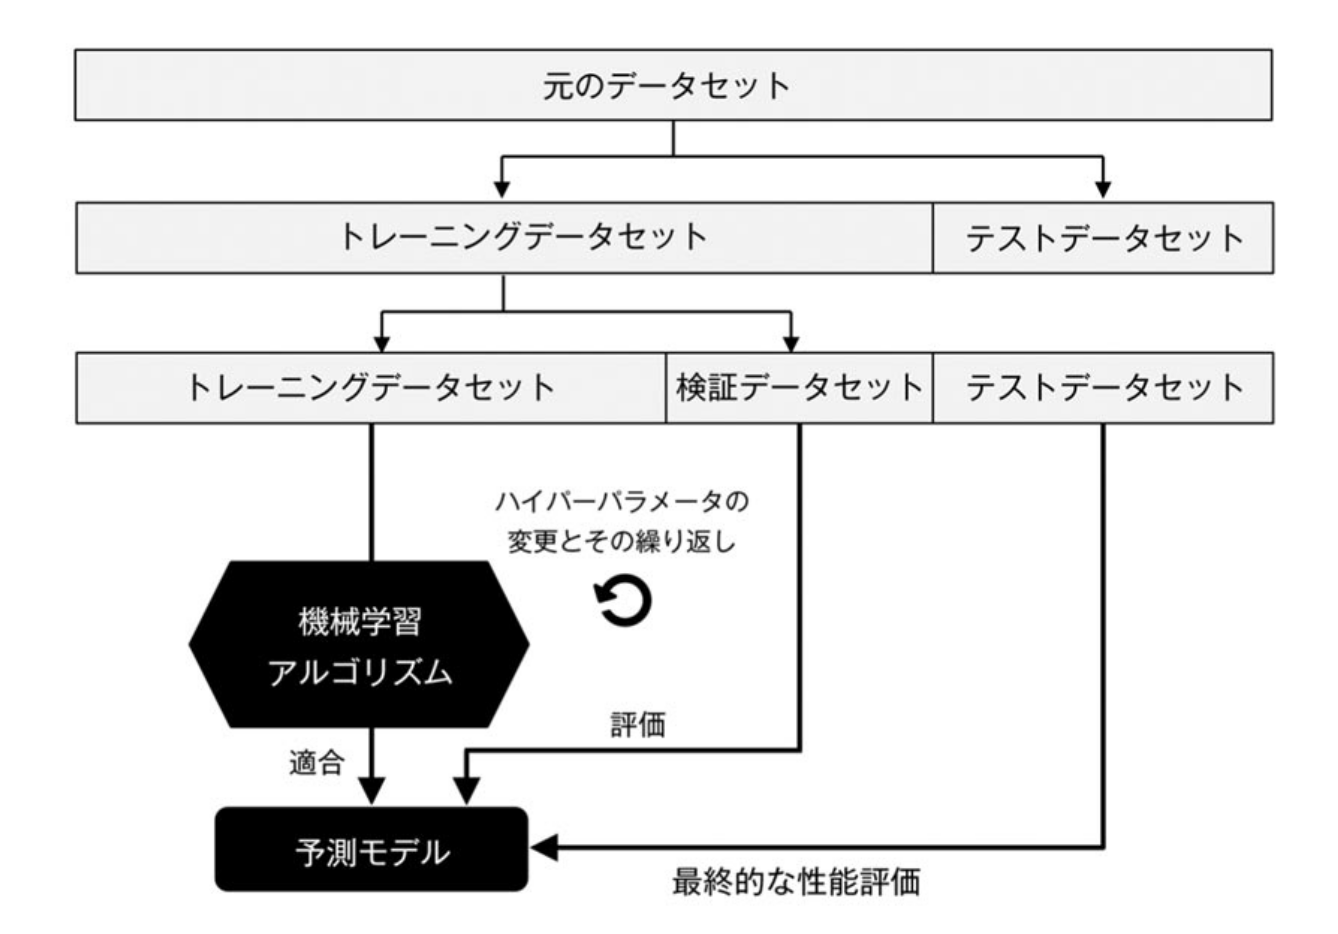

In [26]:
# 画像の表示
from IPython.display import Image
Image(filename='IMG/00.png', width=600)

### k分割交差検証

k分割交差検証では、非復元抽出を用いて、トレーニングデータセットをランダムに$k$個に分割する。<br>
そのうち$k-1$個をモデルのトレーニングに使用し、1個を性能の評価に使用する。<br>
この手順を$k$回繰り返すことで、$k$個のモデルを取得し、性能を推定する。<br>

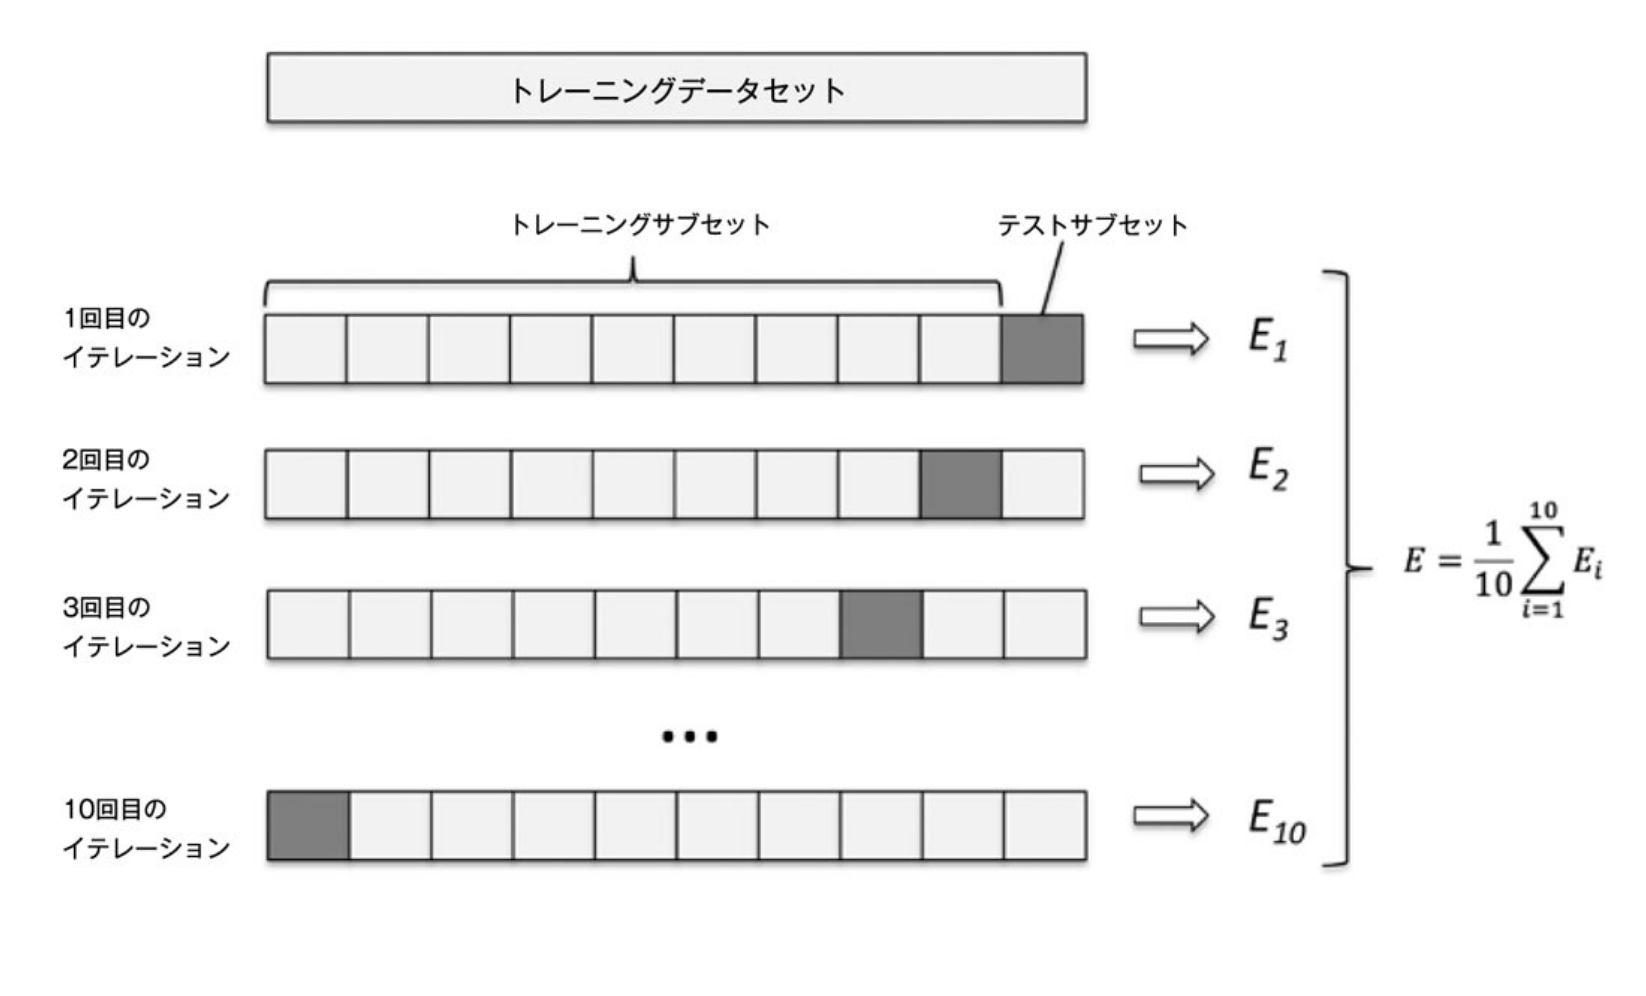

In [27]:
# 画像の表示
from IPython.display import Image
Image(filename='IMG/01.png', width=600)

１０個のイテレーションにおいて、9個がトレーニングに使用され、残りの１個がモデルを評価するための、<br>
テストデータセットとして使用される。<br>
また、サブセットごとに評価された性能$E_{i}$を使って、モデルの推定平均性能$E$が計算される。<br>
$E_{i}$は正解率や誤分類率を表している。<br>

In [28]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
# 分割元データ, 分割数, 乱数生成器の状態を指定し、
# 層化k分割交差検証イテレータを表すStratifiedKFoldクラスのインスタンス化
kfold = StratifiedKFold(n_splits=10, random_state=1).split(X_train, y_train)
scores = list()

for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,
          np.bincount(y_train[train]), score))

Fold:  1, Class dist.: [256 153], Acc: 0.935
Fold:  2, Class dist.: [256 153], Acc: 0.935
Fold:  3, Class dist.: [256 153], Acc: 0.957
Fold:  4, Class dist.: [256 153], Acc: 0.957
Fold:  5, Class dist.: [256 153], Acc: 0.935
Fold:  6, Class dist.: [257 153], Acc: 0.956
Fold:  7, Class dist.: [257 153], Acc: 0.978
Fold:  8, Class dist.: [257 153], Acc: 0.933
Fold:  9, Class dist.: [257 153], Acc: 0.956
Fold: 10, Class dist.: [257 153], Acc: 0.956


In [29]:
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


CV accuracy: 0.950 +/- 0.014


scikit-learnを用いる

In [30]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]
CV accuracy: 0.950 +/- 0.014


### 検証曲線を使って過学習と学習不足を明らかにする

scikit-learnを用いる

/Users/Takanori/anaconda/lib/python3.6/site-packages/matplotlib/legend.py:641: UserWarning: Unrecognized location " lower right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


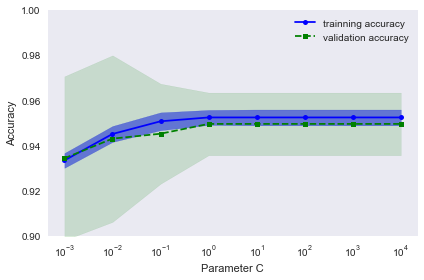

In [34]:
from sklearn.model_selection import validation_curve
# DataVisualization
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
# validation_curve関数によりモデルのパラメータを変化させ
# 交差検証による正解率を算出
# clf_CはLogisticRegressionオブジェクトのパラメータ
train_scores, test_scores = validation_curve(estimator = pipe_lr,
                                             X = X_train,
                                             y = y_train,
                                            param_name = 'logisticregression__C',
                                             param_range =param_range,
                                             cv = 10)
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='trainning accuracy')
plt.fill_between(param_range, train_mean + train_std,
                train_mean - train_std, alpha=0.5, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--',
        marker='s', markersize=5,
        label = 'validation accuracy')
plt.fill_between(param_range,
                            test_mean + test_std,
                            test_mean - test_std,
                            alpha = 0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc=' lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1.0])
plt.tight_layout()
plt.show()

validation_curve関数はデフォルトで層化k分割交差検証を使用することで、モデルの性能を評価する。<br>
validation_curve関数では、評価したパラメータを指定する。<br>
C > 10以上が最適な解と言える。<br>

### グリッドサーチによる機械学習モデルのチューニング

機械学習には、２種類のパラメータがある。<br>
ロジスティック回帰の重みのように、トレーニングデータから学習されるパラメータと、<br>
トレーニングデータから最適化されるのではなく、個別に最適化される学習アルゴリズムのパラメータ。<br>

### ハイパーパラメータ

例)<br>
ロジスティック回帰の正則化パラメータ。<br>
決定木の深さについてのパラメータ。<br>

### グリッドサーチを使ったハイパーパラメータのチューニング